Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [3]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

from scipy.optimize import linear_sum_assignment  # Hungarian algorithm

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)

[Result] Smallest KMeans inertia (k=5): 924.3160


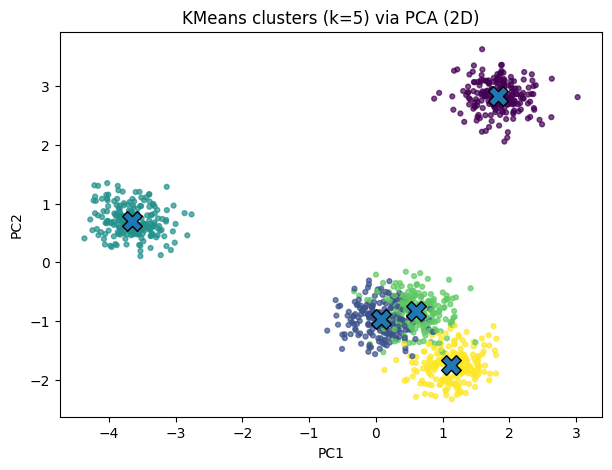


[Label mapping] pred -> true: {np.int64(3): np.int64(0), np.int64(1): np.int64(1), np.int64(0): np.int64(2), np.int64(2): np.int64(3), np.int64(4): np.int64(4)}
[Clustering accuracy after optimal permutation] 1.0000


,pred_0,pred_1,pred_2,pred_3,pred_4
true_0,200,0,0,0,0
true_1,0,200,0,0,0
true_2,0,0,200,0,0
true_3,0,0,0,200,0
true_4,0,0,0,0,200


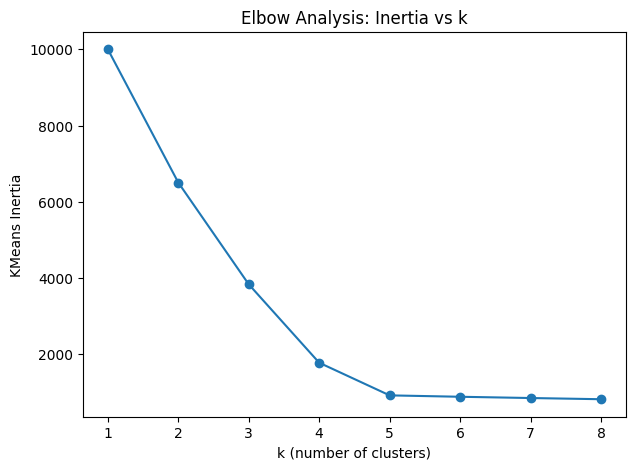

k=1: inertia=10000.0000
k=2: inertia=6504.8399
k=3: inertia=3836.3771
k=4: inertia=1780.4173
k=5: inertia=924.3160
k=6: inertia=887.7170
k=7: inertia=854.6471
k=8: inertia=823.3043


In [4]:
# your code here

# ========== 2) KMeans (k=5) 并报告最小 inertia ==========
k = 5
kmeans = KMeans(n_clusters=k, n_init=30, random_state=1)
kmeans.fit(X)

labels_pred = kmeans.labels_
best_inertia = kmeans.inertia_
print(f"\n[Result] Smallest KMeans inertia (k=5): {best_inertia:.4f}")

# ========== 3) PCA 2D 可视化（点按簇着色 + 簇中心）==========
pca = PCA(n_components=2, random_state=1)
X2 = pca.fit_transform(X)
centers2 = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(7, 5))
plt.scatter(X2[:, 0], X2[:, 1], c=labels_pred, s=12, alpha=0.7)
plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', s=200, edgecolor='k', linewidth=1.0)
plt.title("KMeans clusters (k=5) via PCA (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# ========== 4) 混淆矩阵（先用 Hungarian 做标签最优匹配）==========
# 原始混淆矩阵（true vs predicted）
C = confusion_matrix(y_true, labels_pred)

# 为了“最大化匹配数”，在 -C 上做线性分配（最大化 C）
row_ind, col_ind = linear_sum_assignment(-C)
# 构建 预测标签 -> 真实标签 的映射
pred_to_true = {pred: true for true, pred in zip(row_ind, col_ind)}

# 依据上面的映射重标记预测标签
labels_remapped = np.vectorize(lambda p: pred_to_true[p])(labels_pred)

# 重算对齐后的混淆矩阵 & 精度
C_aligned = confusion_matrix(y_true, labels_remapped)
acc = accuracy_score(y_true, labels_remapped)

print("\n[Label mapping] pred -> true:", pred_to_true)
print(f"[Clustering accuracy after optimal permutation] {acc:.4f}")

# 以表格形式看得更清晰
df_conf = pd.DataFrame(C_aligned,
                       index=[f"true_{i}" for i in range(k)],
                       columns=[f"pred_{i}" for i in range(k)])
display(df_conf)

# ========== 5) Elbow 分析（k = 1 ... 8）==========
ks = list(range(1, 8 + 1))
inertias = []
for kk in ks:
    km = KMeans(n_clusters=kk, n_init=10, random_state=1).fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(ks, inertias, marker='o')
plt.title("Elbow Analysis: Inertia vs k")
plt.xlabel("k (number of clusters)")
plt.ylabel("KMeans Inertia")
plt.xticks(ks)
plt.show()

for kk, inertia in zip(ks, inertias):
    print(f"k={kk}: inertia={inertia:.4f}")

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# =========================
# 0) Quick preview: 5×2 样例图（每类一张）
# =========================
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here